In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from astropy.constants import R_jup, R_sun, R_earth, au, M_sun
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
from numpy import pi
from scipy import optimize

import bateman as bt
import thermalization as th
import heat as ht


kb =1.38064852e-16
h = 6.62607004e-27
c = 2.99792458e10
eV = 1.60218e-12
MeV = 1.0e6*eV
me = 9.10938356e-28
e = 4.803204e-10
mu = 1.66054e-24
day = 86400.
Msun = 1.9885e33

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read effective opacities to gamma-rays for each elements.

In [13]:
#fkappa = pd.read_csv('effective_kappa_A141_238.dat',delim_whitespace=True,header=None)
fkappa = pd.read_csv('input_files/effective_kappa_A85_238.dat',delim_whitespace=True,header=None)
#fkappa = pd.read_csv('effective_kappa_141_238.dat',delim_whitespace=True,header=None)

kappa_effs = 0.02*np.ones((240,100))
for i in range(0,len(fkappa)):
    A = fkappa[0][i]
    Z = fkappa[1][i]
    kappa = np.sqrt(fkappa[3][i]*fkappa[4][i])
    kappa_effs[A][Z] = kappa


Read abundances of each beta-decay chain. 
The file format is
(Z A Y), where Z is an atomic number, A is an atomic mass number, and Y is a number fraction.

In [14]:
ffraction = pd.read_csv('input_files/solar_r_abundance_pattern.dat',delim_whitespace=True,header=None)

Define the range of atomic numbers of beta-decay chains and the ejecta model (density profile).
we use a radial density profile of merger ejecta with a total mass of 
$M_{\rm ej}$ and a minimum velocity of $v_0$:
\begin{eqnarray}
  \rho(t,v) = 
        \rho_0(t)\left(\frac{v_{\rm ej}}{v_0}\right)^{-n} for (v_0\leq v_{\rm ej}\leq v_{\rm max})
\end{eqnarray}
where $\rho_0(t)$ is defined such that 
\begin{eqnarray}
M_{\rm ej} = 4\pi \int_{v_0}^{v_{\rm max}}dvv^2 \rho(t,v).
\end{eqnarray}


In [15]:
##########Start input parameters
Amin = 88
Amax = 238

##########ejecta parameters for thermalization
Mej = 0.05*Msun
vej = 0.1*c
n = 4.5
alpha_max = 4.0#v_max = alpha_max * vej
alpha_min = 1.#v_min = alpha_min * vej


Calculate the beta decay radioactive power and heating rate.

In [16]:
beta = ht.calc_heating_rate(Mej,vej, Amin,Amax,ffraction,kappa_effs,alpha_max,alpha_min,n)

total time step =  44


Save the data.

In [17]:
data = {'t':beta['t'],'total':beta['total'],'gamma':beta['gamma'], 'electron':beta['electron'], 'gamma_th':beta['gamma_th'],'electron_th':beta['electron_th']}
df = pd.DataFrame(data=data)
df.to_csv('output_files/heat88_238_M001_v04_v1_n45.dat',sep=" ",index=False,header=None,columns=['t', 'total', 'gamma', 'electron','gamma_th','electron_th'])

Plot the data.

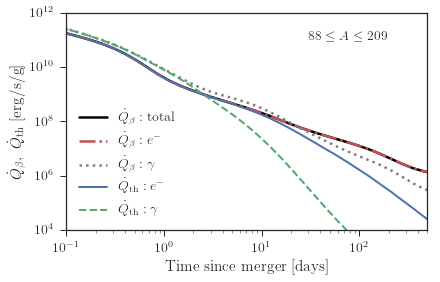

In [11]:
from matplotlib import rc
rc('text', usetex=True)
sns.set(style='ticks',font_scale=1.4)
fig, ax = plt.subplots(figsize=(6.472135955, 4))
plt.xlim(0.1,500.)
plt.ylim(1.0e4,1.0e12)
plt.ylabel(r"$\dot{Q}_{\beta},~\dot{Q}_{\rm th}~[{\rm erg/s/g}]$")
plt.xlabel(r"${\rm Time~since~merger~[days]}$")
plt.loglog(beta['t'],beta['electron'],label=r'$\dot{Q}_{\beta}:{\rm total}$',linestyle='-',linewidth=2.5,color='k')
plt.loglog(beta['t'],beta['electron'],label=r'$\dot{Q}_{\beta}:e^{-}$',linestyle='-.',linewidth=2.5,color='C2')
plt.loglog(beta['t'],beta['gamma'],label=r'$\dot{Q}_{\beta}:\gamma$',linestyle=':',linewidth=2.5,color='grey')
plt.loglog(beta['t'],beta['electron_th'],label=r'$\dot{Q}_{\rm th}:e^{-}$',linestyle='-',linewidth=2.,color='C0')
plt.loglog(beta['t'],beta['gamma_th'],label=r'$\dot{Q}_{\rm th}:\gamma$',linestyle='--',linewidth=2.,color='C1')

plt.text(30,1.0e11,'$88\leq A\leq 209$',fontsize=13.5)

plt.legend(loc='lower left',fontsize=14)
plt.savefig("output_files/heat_A88.pdf",dpi=600,bbox_inches='tight')
plt.show()